# 02_Beginning of Deeplearning - Blood Fat

In [2]:
import numpy as np

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt'
raw_data = np.genfromtxt(url, skip_header=36)
raw_data

## index 안내
# 0 : index_num
# 1 : 구분선
# 2~4 : data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

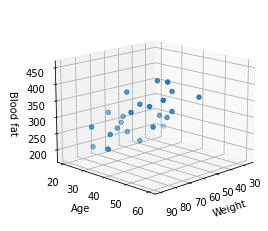

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 45)
            # 위아래 각도
                # 좌우 각도
plt.show()

> ### - 이 예제의 목적은 입력인 `나이`와 `몸무게`를 알려주면, 주어진 데이터 기준의 `blood fat`을 얻는 것이다.
> ### - 즉, 40살, 100키로인 사람의 데이터 기준 blood fat은 ? 하고 물으면, 얼마입니다. 하고 답이 나와야 하는 것이다.
> ### - `Linear Regression`

![](./lecture_image/02-01.png)

![](./lecture_image/02-02.png)
> #### - `X.shape` : (25 * 2)
> #### - `W.shape` : (2 * 1)
> #### - `b.shape` : (25 * 1)

>> - `y의 shape이 위의 계산 shape과 같아야 한다.`

---------------

In [25]:
# 학습 대상 데이터 추리기
x_data = np.array(raw_data[:,2:4], dtype=np.float32)        # (25,2) shape      // feature data
y_data = np.array(raw_data[:,4], dtype=np.float32)          # (25,) shape

y_data = y_data.reshape((25,1))     # (25,1) shape 으로 변환해야 한다.

In [26]:
# 모델 만들기
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-30 23:09:09.082047: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-30 23:09:09.082512: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## **loss 란**
- 학습을 위해서는 `loss(cost) 함수`를 정해주어야 한다.
- loss 함수는 간략히 말해서, `정답까지 얼마나 멀리 있는지를 측정`하는 함수이다.
- 이번에는 `mse:Mean Squared Error (오차 제곱의 평균)`을 사용
- 그리고, `옵티마이저를 선정`한다.
- 옵티마이저는 `loss를 어떻게 줄일것인지를 결정하는 방법`을 선택하는 것이다.

In [28]:
model.compile(optimizer='rmsprop', loss='mse')

## **optimazer**
- optimizer는 `loss 함수를 최소화하는 가중치를 찾아가는 과정`에 대한 알고리즘이다.
- 여기서는 `rmsprop`를 사용

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# `fit`

In [ ]:
hist = model.fit(x_data, y_data, epochs=5000)
                # feature
                        # label
                                # epochs